<a href="https://colab.research.google.com/github/anmoltiwari0712/Neural_Networks/blob/main/final_anmol_copy_of_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 146M/149M [00:00<00:00, 317MB/s]
100% 149M/149M [00:00<00:00, 303MB/s]


In [ ]:
!unzip /content/brain-tumor-mri-dataset.zip -d /content/data/

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/data/Training/glioma/Tr-gl_

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
# Load and preprocess images (resized to 224x224 for ResNet50)
def load_images(directory, label):
    images = []
    labels = []
    for file in os.listdir(directory):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(label)
    return np.array(images), np.array(labels)


In [ ]:

glioma_images, glioma_labels = load_images('/content/data/Training/glioma', 0)
meningioma_images, meningioma_labels = load_images('/content/data/Training/meningioma', 1)
notumor_images, notumor_labels = load_images('/content/data/Training/notumor', 2)
pituitary_images, pituitary_labels = load_images('/content/data/Training/pituitary', 3)

# Combine all training data
X_train = np.concatenate((glioma_images, meningioma_images, notumor_images, pituitary_images))
y_train = np.concatenate((glioma_labels, meningioma_labels, notumor_labels, pituitary_labels))

# Load testing data
glioma_test_images, glioma_test_labels = load_images('/content/data/Testing/glioma', 0)
meningioma_test_images, meningioma_test_labels = load_images('/content/data/Testing/meningioma', 1)
notumor_test_images, notumor_test_labels = load_images('/content/data/Testing/notumor', 2)
pituitary_test_images, pituitary_test_labels = load_images('/content/data/Testing/pituitary', 3)

# Combine all testing data
X_test = np.concatenate((glioma_test_images, meningioma_test_images, notumor_test_images, pituitary_test_images))
y_test = np.concatenate((glioma_test_labels, meningioma_test_labels, notumor_test_labels, pituitary_test_labels))

In [ ]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
                             width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

In [ ]:
# Load the DenseNet121 model with pre-trained weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of DenseNet121
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the DenseNet121 layers to prevent retraining them
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


29084464/29084464 [==============================] - 0s 0us/step


**With more time , model can be trained on more Epochs to increase accuracy**

In [ ]:
epochs = 60
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=epochs)


Epoch 1/60
179/179 [==============================] - 129s 721ms/step - loss: 0.4500 - accuracy: 0.8402 - val_loss: 0.4700 - val_accuracy: 0.8207
Epoch 2/60
179/179 [==============================] - 127s 708ms/step - loss: 0.3936 - accuracy: 0.8580 - val_loss: 0.4301 - val_accuracy: 0.8299
Epoch 3/60
179/179 [==============================] - 129s 720ms/step - loss: 0.3646 - accuracy: 0.8685 - val_loss: 0.4048 - val_accuracy: 0.8398
Epoch 4/60
179/179 [==============================] - 129s 722ms/step - loss: 0.3390 - accuracy: 0.8789 - val_loss: 0.3623 - val_accuracy: 0.8596
Epoch 5/60
179/179 [==============================] - 129s 720ms/step - loss: 0.3392 - accuracy: 0.8750 - val_loss: 0.3418 - val_accuracy: 0.8696
Epoch 6/60
179/179 [==============================] - 126s 703ms/step - loss: 0.3160 - accuracy: 0.8834 - val_loss: 0.3500 - val_accuracy: 0.8566
Epoch 7/60
179/179 [==============================] - 129s 721ms/step - loss: 0.3088 - accuracy: 0.8892 - val_loss: 0.3195 -

In [ ]:
model.save('brain_tumor_classifier.keras')

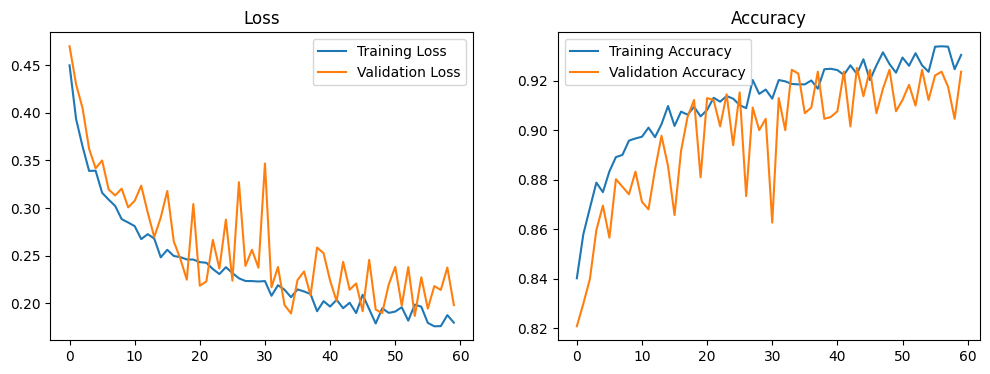

In [ ]:
# Visualizations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()


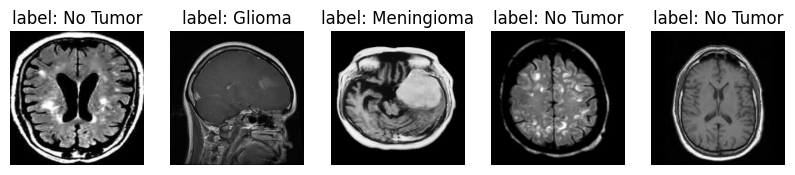

In [ ]:
class_labels = ['Glioma', 'Meningioma', 'No Tumor', 'Pituitary Tumor']

def plot_sample_images(X, y, n_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(n_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X[idx])
        plt.title(f"label: {class_labels[np.argmax(y[idx])]}")
        plt.axis('off')
    plt.show()

# Show 5 random sample images with labels from the test set
plot_sample_images(X_test, y_test, n_samples=5)

In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes, target_names=class_labels))

41/41 [==============================] - 23s 562ms/step
                 precision    recall  f1-score   support

         Glioma       0.95      0.89      0.92       300
     Meningioma       0.89      0.81      0.85       306
       No Tumor       0.98      0.98      0.98       405
Pituitary Tumor       0.86      1.00      0.92       300

       accuracy                           0.92      1311
      macro avg       0.92      0.92      0.92      1311
   weighted avg       0.93      0.92      0.92      1311



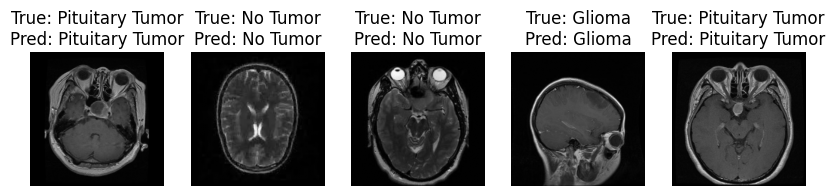

In [ ]:
def plot_predictions(X, y_true, y_pred, n_samples=5):
    plt.figure(figsize=(10, 10))
    for i in range(n_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(1, n_samples, i+1)
        plt.imshow(X[idx])
        true_label = class_labels[np.argmax(y_true[idx])]
        pred_label = class_labels[y_pred[idx]]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.show()

# Show 5 random test images with true and predicted labels
plot_predictions(X_test, y_test, y_pred_classes, n_samples=5)

This is the beginning of the project and to improve accuracy :



*   Epochs to be increased
*   Learning rate to be tweaked
*   Removing noise in data preprocessing
*   Adding or removing custom layers from DenseNet121
*   Changes in Batch size
*   More Data Augmentation





